# Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('~/notebooks/data/kaggle/creditcard.csv')

In [8]:
# create the train, test split
df_train, df_test = train_test_split(df)

# drop the target feature from the training set
y_train = df_train[['Class']]
X_train = df_train.drop(['Class'], axis=1)

In [22]:
# use PCA form dimension reduction
pca = PCA()
pca.fit(X_train, y_train)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
sum(pca.explained_variance_ratio_)

0.9999999999999996

In [51]:
pca.explained_variance_
df_train = df_train.iloc[:-1, 1:3]

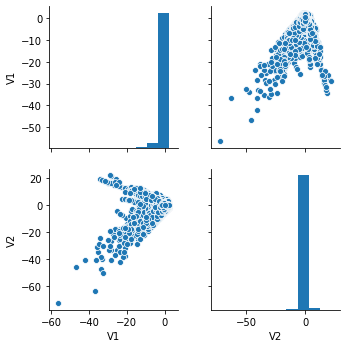

In [52]:
sns.pairplot(df_train)

In [55]:
pca.score(df_test)

ValueError: operands could not be broadcast together with shapes (71202,31) (30,) 